# Setup Augmentation Pipe

Create augmentation pipe using imgaug library. Before putting images into pipe, size of all images should be same. (ex. 64x64 or 128x128)

End of pipe, images will be resized to 64x64.

## List of augmentation operations
* Random crop (1 ~ 16 px)
* Random rotate
* Random gaussian blur (sigma: 0.0 ~ 3.0)
* Random motion blur
* Random contrast

In [1]:
import imgaug.augmenters as iaa

seq = iaa.Sequential(
    [
        # 이미지를 모든 사이드에서 크롭. 
        iaa.Crop(px=(1, 16), keep_size=False),
        # 회전
        iaa.Rotate(),
        # 수직으로 뒤집기
        iaa.Flipud(0.2),
        # 아래의 것에서 0~2개를 무작위로 적용
        iaa.SomeOf((0, 2), [
            # 초점의 흐림 구현을 위한 가우시안 블러를 적용
            iaa.GaussianBlur(sigma=(0.0, 3.0)),
            # 카메라의 흔들림 구현을 위한 모션 블러 적용
            iaa.MotionBlur(),
        ]),
        # 촬영 환경에 따른 색온도를 고려하여 조정 (1000=최저/따뜻함, 16000=최대/차가움)
        #iaa.ChangeColorTemperature(kelvin=(6000, 8000)),
        # 어두움, 밝음을 위한 대비 조절
        iaa.LogContrast(gain=(0.7, 1.4)),
        # 64x64로 리사이징
        iaa.Resize(64),
    ],
    # 순서를 무작위화
    #random_order=True
)

def augment(images):
    return seq(images=images)

# Put all images into Augmentation Pipe

Load all images from `../images` and put them into augmentation pipe.

You can increase amount of images using constant `AMOUNT_MULTIPLIER`. For example, `10` will copy given images 10 times.

`NORMALIZED_WIDTH` and `NORMALIZED_HEIGHT` are used for normalize size of input images.

(If you want to adjust output images, go above and edit pipe `iaa.Resize()`.)

In [2]:
import os
import cv2

DATA_ROOT_PATH = '../images'
PEPSI_PATH = os.path.join(DATA_ROOT_PATH, 'pepsi')

# Augmentation 인풋으로 사용할 이미지 크기
# (최종적으로는 64x64로 리사이징됨. iaa.Resize() 참고)
NORMALIZED_WIDTH = 128
NORMALIZED_HEIGHT = 128

# 데이터 증폭 배수 (330장 * 10 = 3300장)
AMOUNT_MULTIPLIER = 10

def read_image(file: str):
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(NORMALIZED_WIDTH, NORMALIZED_HEIGHT))
    return image

def load_batch():
    for file in os.listdir(PEPSI_PATH):
        if file.endswith('.png') or file.endswith('.jpg'):
            image = read_image(os.path.join(PEPSI_PATH, file))
            for _ in range(AMOUNT_MULTIPLIER):
                yield image

augmentor = augment([image for image in load_batch()])

print('===== Augmentation Result =====')
print(f'Image Amount = {len(augmentor)}')

===== Augmentation Result =====
Image Amount = 2990


# Display Augmentation Result

Edit `COLS` and `ROWS` to modify output. Images will be shown as exactly `COLS * ROWS`.

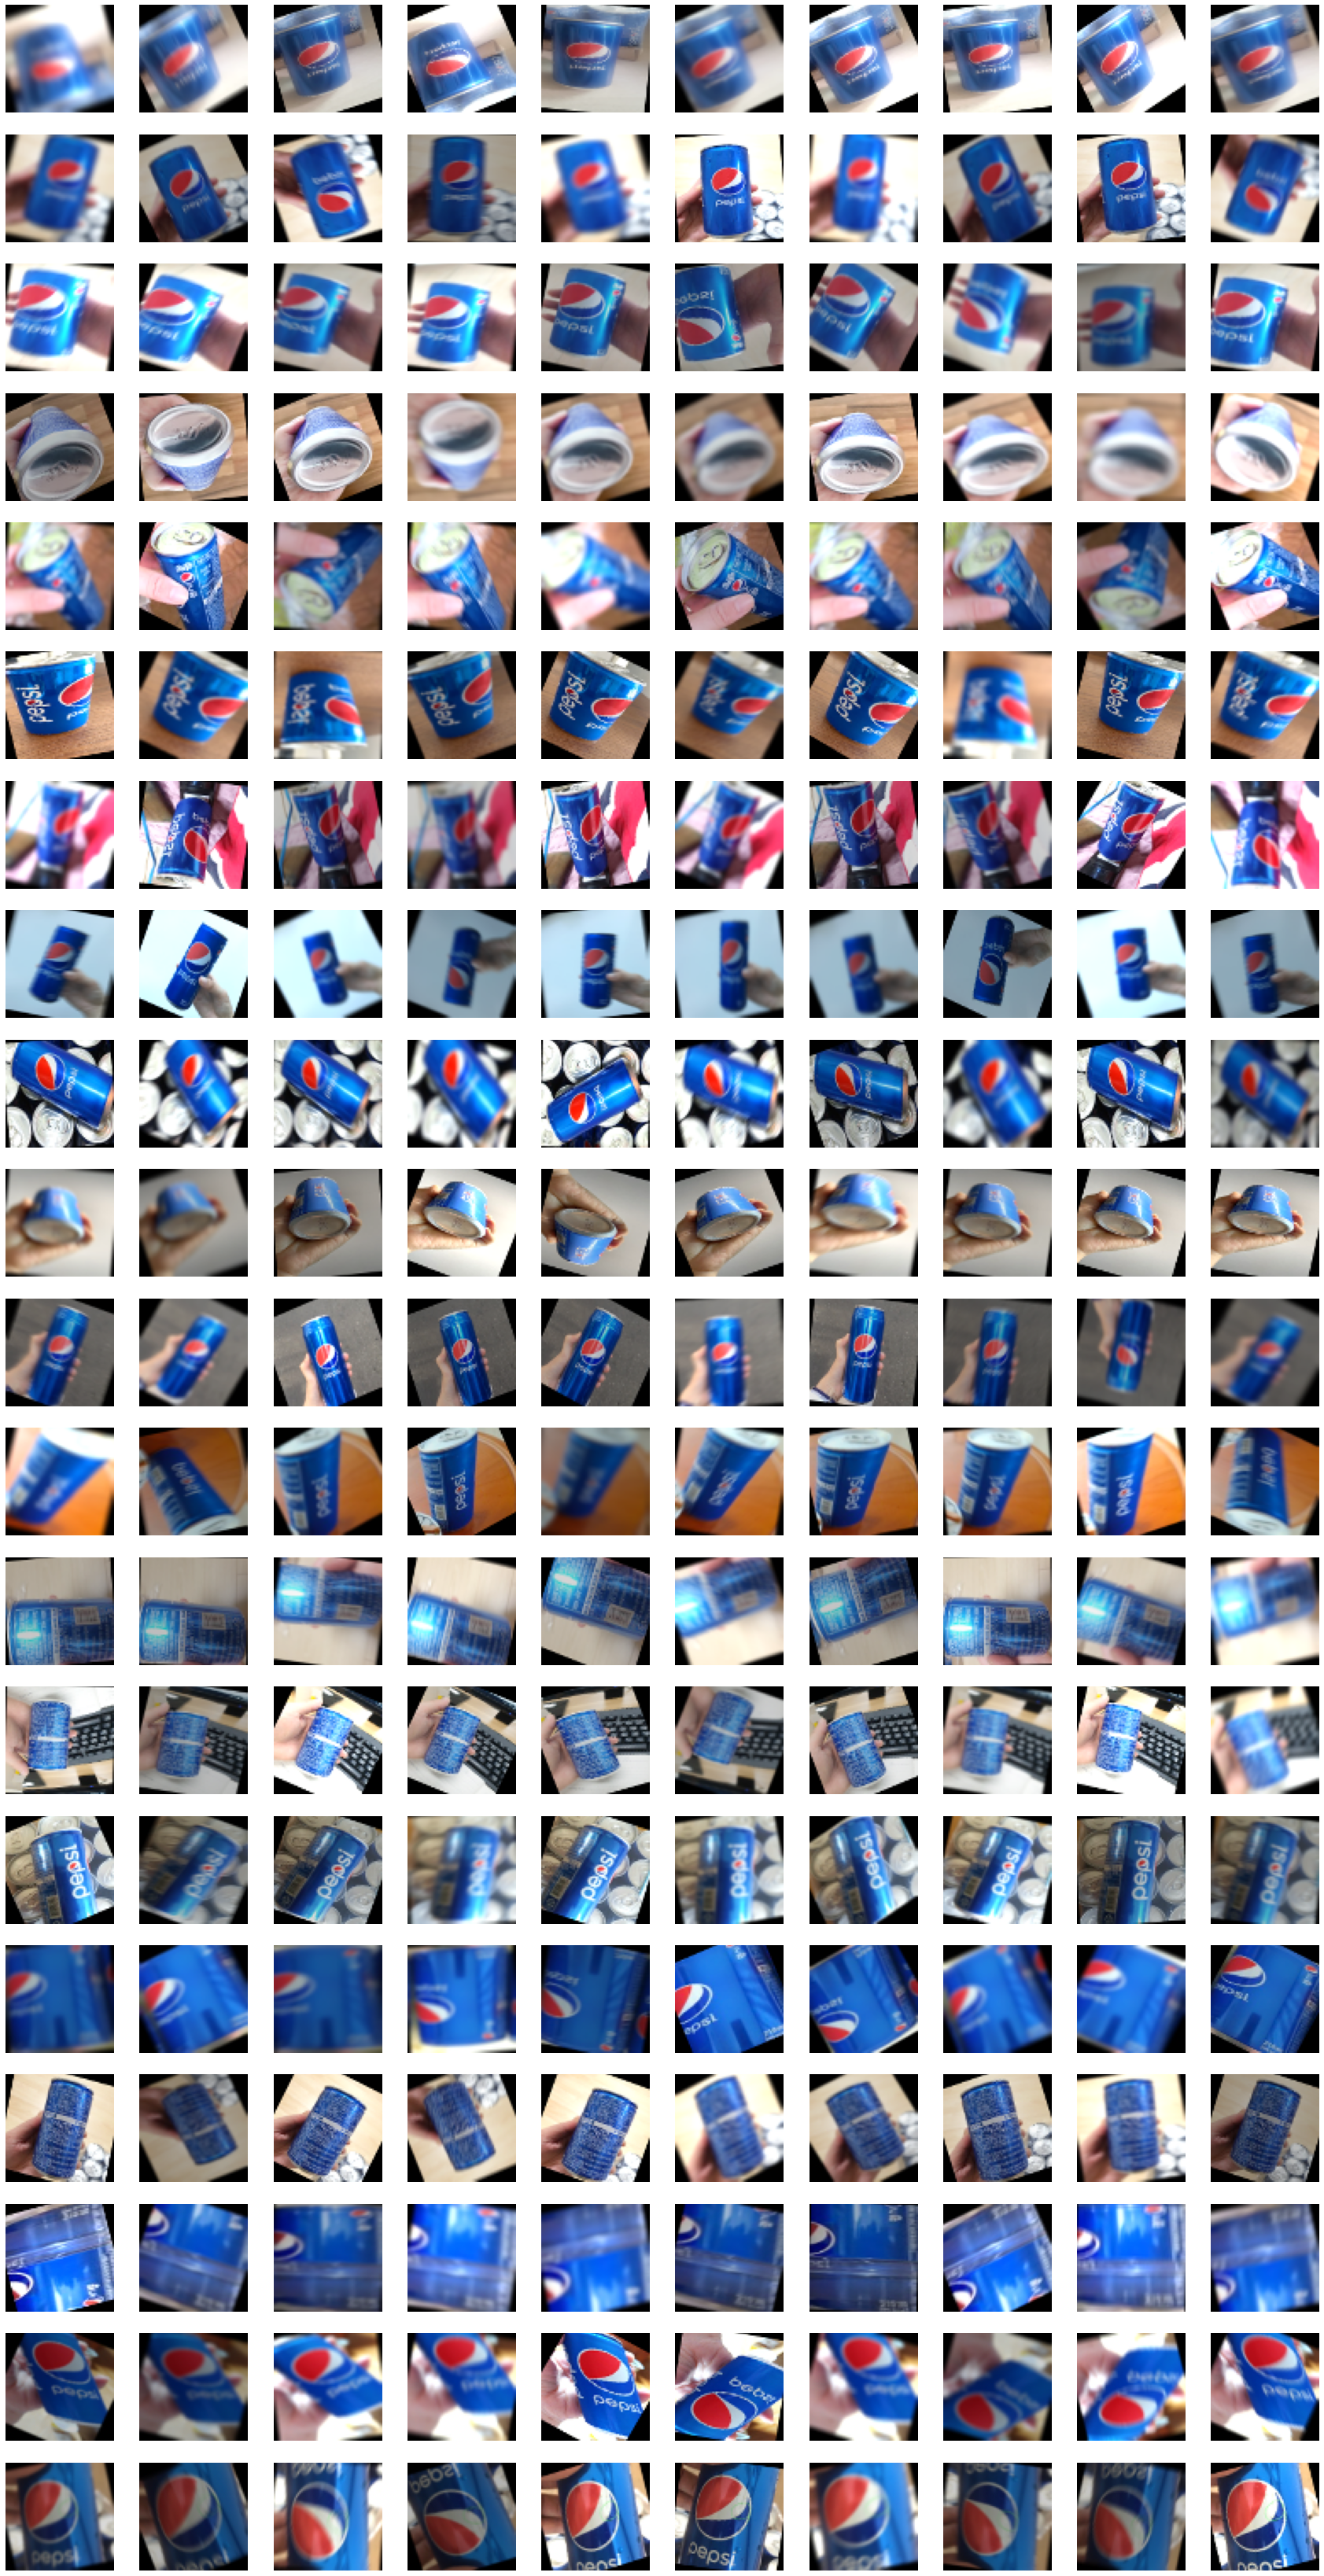

In [3]:
import matplotlib.pyplot as plt

COLS = 10
ROWS = 20

axes = []
fig = plt.figure(figsize=(COLS * 3, ROWS * 3))
it = iter(augmentor)
images = [next(it) for _ in range(COLS * ROWS)]

for i in range(ROWS * COLS):
    axes.append(fig.add_subplot(ROWS, COLS, i + 1))
    axes[-1].axis('off')
    plt.imshow(images[i])

plt.show()